In [1]:
import os
import sys
import glob 
from functools import reduce
import seaborn as sb
import pandas as pd
import random

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
sys.path.append("../")
from simulation.cloud import *
from simulation.data import *
from simulation.plot import *
from simulation.log import *
# from simulation.utils import plot_ecdf, ecdf

In [4]:
NUM_LEAFS = 576
NUM_HOSTS_PER_LEAF = 48
NUM_RULES_PER_LEAF = 1000
MAX_VMS_PER_HOST = 20
NUM_TENANTS = 3000
MIN_VMS_PER_TENANT = 10
MAX_VMS_PER_TENANT = 5000
VM_DIST = "expon"  # options: expon
NUM_GROUPS = 100000
MIN_GROUP_SIZE = 5
GROUP_SIZE_DIST = "wve"  # options: uniform and wve
PLACEMENT_DIST = "colocate-random-linear"  # options: uniform, colocate-random-linear, 
# colocate-random-random, sorted-colocate-random-linear, and sorted-colocate-random-random
COLOCATE_NUM_HOSTS_PER_LEAF = 48
NUM_BITMAPS = 24
NUM_LEAFS_PER_BITMAP = 3
REDUNDANCY_PER_BITMAP = 0
MAX_BATCH_SIZE = 1
ALGORITHM = 'fuzzy_match'  # options: single_match, exact_match, fuzzy_match, greedy_match, random_fuzzy_match
SEED = 0

In [5]:
random.seed(SEED)

cloud = Cloud(num_leafs=NUM_LEAFS,
              num_hosts_per_leaf=NUM_HOSTS_PER_LEAF,
              num_rules_per_leaf=NUM_RULES_PER_LEAF,
              max_vms_per_host=MAX_VMS_PER_HOST,
              num_tenants=NUM_TENANTS,
              min_vms_per_tenant=MIN_VMS_PER_TENANT,
              max_vms_per_tenant=MAX_VMS_PER_TENANT,
              vm_dist=VM_DIST,
              num_groups=NUM_GROUPS,
              min_group_size=MIN_GROUP_SIZE,
              group_size_dist=GROUP_SIZE_DIST,
              placement_dist=PLACEMENT_DIST,
              colocate_num_hosts_per_leaf=COLOCATE_NUM_HOSTS_PER_LEAF,
              num_bitmaps=NUM_BITMAPS,
              num_leafs_per_bitmap=NUM_LEAFS_PER_BITMAP,
              redundancy_per_bitmap=REDUNDANCY_PER_BITMAP,
              max_batch_size=MAX_BATCH_SIZE,
              algorithm=ALGORITHM)

optimization: 100%|██████████| 3000/3000 [04:57<00:00, 10.07it/s]


In [6]:
data = Data(cloud)

In [7]:
data.algorithm_elapse_time().describe()

count    9.851200e+04
mean     3.022272e-03
std      4.663516e-02
min      8.307397e-07
25%      8.661300e-07
50%      8.922070e-07
75%      2.153218e-06
max      3.036764e+00
dtype: float64

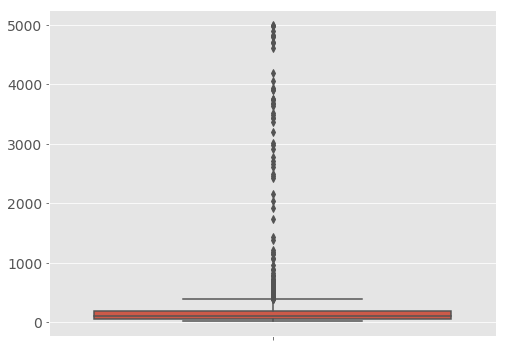

In [8]:
sb.boxplot(y=data.vm_count_for_all_tenants())

In [9]:
sum(data.vm_count_for_all_tenants())

543464

In [10]:
# sb.kdeplot(data.vm_count_for_all_tenants(), cumulative=True)

In [11]:
data.vm_count_for_all_tenants().describe()

count    3000.000000
mean      181.154667
std       433.082649
min        10.000000
25%        46.000000
50%        98.000000
75%       184.000000
max      4999.000000
dtype: float64

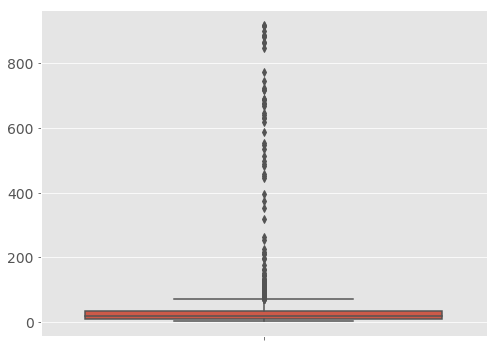

In [12]:
sb.boxplot(y=data.group_count_for_all_tenants())

In [13]:
# sb.kdeplot(data.group_count_for_all_tenants(), cumulative=True)

In [14]:
data.group_count_for_all_tenants().describe()

count    3000.000000
mean       32.837333
std        79.683976
min         1.000000
25%         8.000000
50%        18.000000
75%        33.000000
max       919.000000
dtype: float64

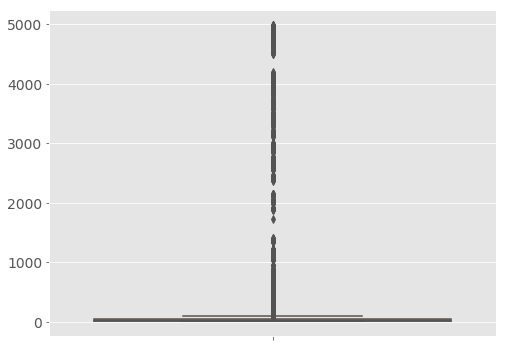

In [15]:
sb.boxplot(y=data.group_sizes_for_all_tenants())

In [16]:
# sb.kdeplot(data.group_sizes_for_all_tenants(), cumulative=True)

In [17]:
data.group_sizes_for_all_tenants().describe()

count    98512.000000
mean        60.217730
std        282.936607
min          5.000000
25%          7.000000
50%         12.000000
75%         41.000000
max       4988.000000
dtype: float64

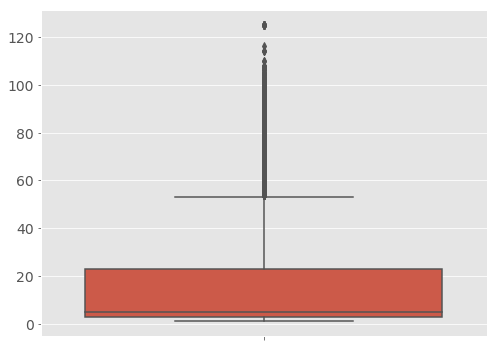

In [18]:
sb.boxplot(y=data.leafs_for_all_groups_in_all_tenants())

In [19]:
# sb.kdeplot(data.leafs_for_all_groups_in_all_tenants(), cumulative=True)

In [20]:
data.leafs_for_all_groups_in_all_tenants().describe()

count    98512.000000
mean        17.363773
std         23.045701
min          1.000000
25%          3.000000
50%          5.000000
75%         23.000000
max        125.000000
dtype: float64

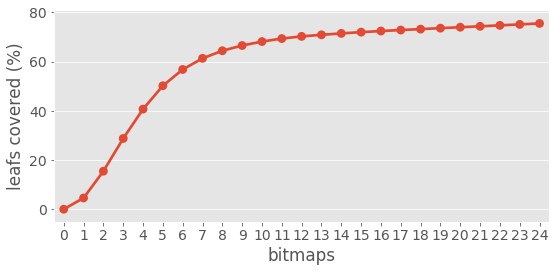

In [21]:
plot_data = pd.DataFrame()

plot_data['bitmaps'] = [i for i in range(0, NUM_BITMAPS + 1)]
plot_data['leafs covered (%)'] = data.percentage_of_groups_covered_with_varying_bitmaps(NUM_BITMAPS)

sb.factorplot(x='bitmaps', y='leafs covered (%)', data=plot_data, size=4, aspect=2)

In [22]:
data.percentage_of_groups_covered_with_varying_bitmaps(NUM_BITMAPS).describe()

count    25.000000
mean     59.060094
std      22.886594
min       0.000000
25%      56.797141
50%      70.256415
75%      73.202249
max      75.517703
dtype: float64

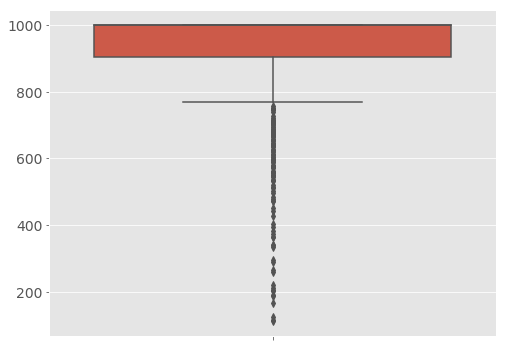

In [23]:
sb.boxplot(y=data.rules_for_all_leafs())

In [24]:
len(data.rules_for_all_leafs())

576

In [25]:
data.rules_for_all_leafs().describe()

count     576.000000
mean      903.126736
std       189.079333
min       111.000000
25%       903.750000
50%      1000.000000
75%      1000.000000
max      1000.000000
dtype: float64

progress: 100%|██████████| 3000/3000 [00:01<00:00, 1710.26it/s]


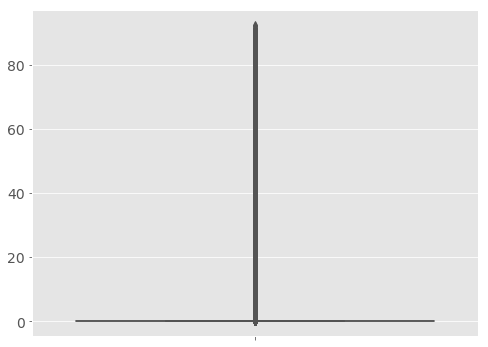

In [26]:
sb.boxplot(y=data.redundancy_for_all_groups_in_all_tenants())

In [27]:
# data.rules_for_all_groups_pre_optimization().describe()

In [28]:
# data.rules_for_all_groups_post_optimization().describe()

In [29]:
at_leaf, ut_leaf = data.traffic_stats()

progress: 100%|██████████| 3000/3000 [00:05<00:00, 561.24it/s]


In [30]:
data.traffic_overhead(at_leaf, ut_leaf)

43.87690645409377

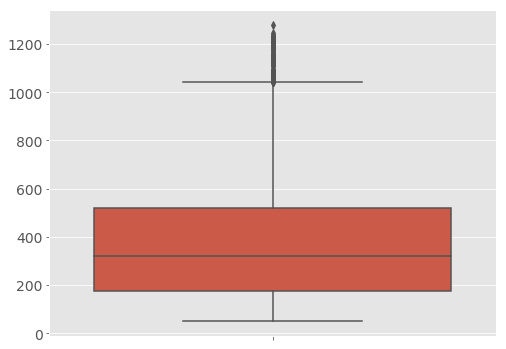

In [31]:
tt_link = data.total_traffic_per_link(at_leaf, ut_leaf)
sb.boxplot(y=tt_link)

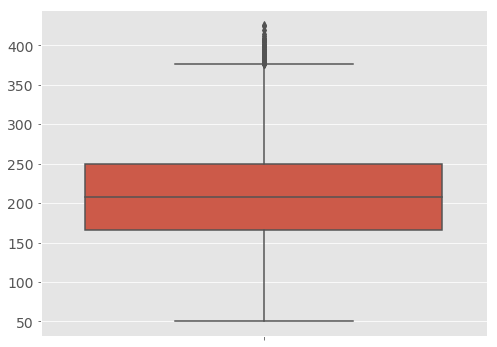

In [32]:
at_link = data.actual_traffic_per_link(at_leaf)
sb.boxplot(y=at_link)

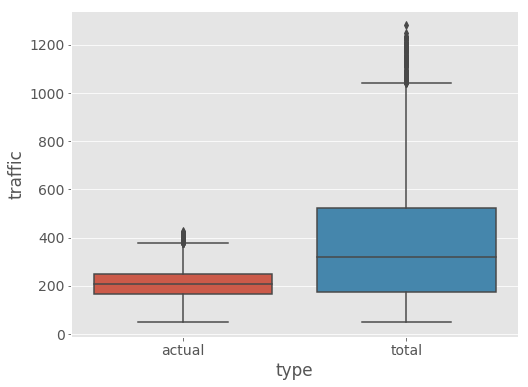

In [33]:
traffic_data = pd.DataFrame(columns=['type', 'traffic'])

at_data = pd.DataFrame()
at_data['type'] = ['actual' for _ in range(len(at_link))]
at_data['traffic'] = at_link
traffic_data = traffic_data.append(at_data)

tt_data = pd.DataFrame()
tt_data['type'] = ['total' for _ in range(len(tt_link))]
tt_data['traffic'] = tt_link
traffic_data = traffic_data.append(tt_data)

sb.boxplot(x='type', y='traffic', data=traffic_data)

In [34]:
to_link = data.traffic_overhead_per_link(tt_link, at_link)

progress: 100%|██████████| 27648/27648 [00:00<00:00, 43385.94it/s]


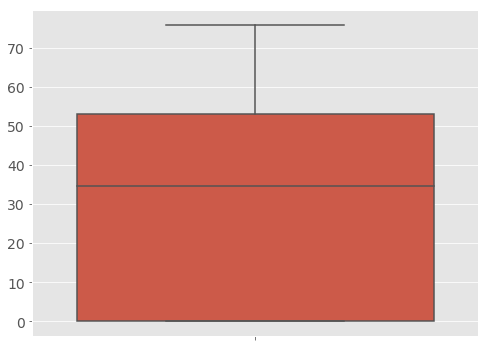

In [35]:
sb.boxplot(y=to_link)

In [35]:
to_link.describe()

count    27648.000000
mean         2.713702
std          2.166614
min          0.000000
25%          1.459854
50%          2.262443
75%          3.243243
max         20.277778
dtype: float64